In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Conv1D,BatchNormalization

with open('speaker_data.json', "r") as file:
    data = json.load(file)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) 

In [2]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5)

model = Sequential()
model.add(Conv1D(256,kernel_size=(5),input_shape=(X_train.shape[1],X_train.shape[2]),padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add((LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation = "softmax"))

In [3]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 256)            16896     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 256)            1024      
_________________________________________________________________
lstm (LSTM)                  (None, 5, 128)            197120    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [5]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=30,
                    callbacks=[rlrop],
                    verbose=2)

Epoch 1/30
2110/2110 - 46s - loss: 0.2528 - accuracy: 0.9104 - val_loss: 0.1210 - val_accuracy: 0.9577 - lr: 0.0010
Epoch 2/30
2110/2110 - 45s - loss: 0.1433 - accuracy: 0.9499 - val_loss: 0.1125 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 3/30
2110/2110 - 45s - loss: 0.1153 - accuracy: 0.9602 - val_loss: 0.1068 - val_accuracy: 0.9636 - lr: 0.0010
Epoch 4/30
2110/2110 - 45s - loss: 0.0992 - accuracy: 0.9666 - val_loss: 0.0949 - val_accuracy: 0.9676 - lr: 0.0010
Epoch 5/30
2110/2110 - 45s - loss: 0.0897 - accuracy: 0.9697 - val_loss: 0.0970 - val_accuracy: 0.9693 - lr: 0.0010
Epoch 6/30
2110/2110 - 45s - loss: 0.0801 - accuracy: 0.9722 - val_loss: 0.0743 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 7/30
2110/2110 - 45s - loss: 0.0739 - accuracy: 0.9747 - val_loss: 0.0861 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 8/30
2110/2110 - 45s - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.0796 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 9/30
2110/2110 - 44s - loss: 0.0633 - accuracy: 0.9777 - val_loss:

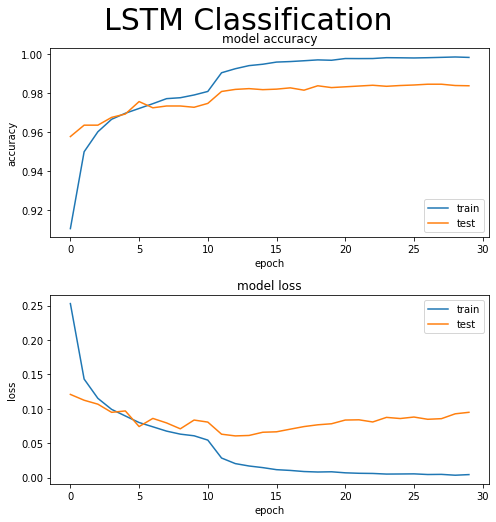

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('LSTM Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import classification_report
labelNames = ['Jens_Stoltenberg','Margaret_Thatcher','Julia_Gillard','Nelson_Mandela','Benjamin_Netanyahu']
predictions = model.predict(X_test, batch_size=32)

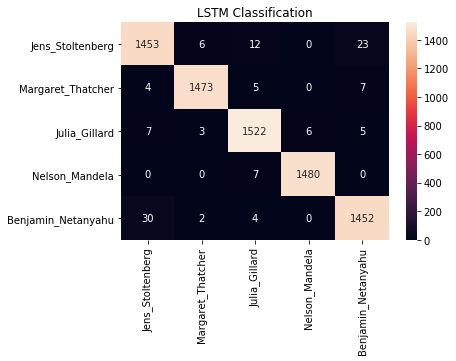

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1))
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('LSTM Classification');

In [10]:
98.39

98.39